# 🧪 Showcase: Contextual Spam Detection using Text Embedding
### โดย Assist. Prof. Dr. CJ  
สาธิตการใช้ Sentence Embedding เพื่อจำแนกข้อความ Spam/Ham ตามบริบท

**แนวคิดหลัก:**
- ใช้โมเดล embedding เพื่อแทนความหมายของข้อความในเชิงเวกเตอร์
- วิเคราะห์ว่าข้อความใดอยู่ใกล้กันใน semantic space เพื่อแยกกลุ่ม spam ออกจาก ham

In [1]:
!pip install -q sentence-transformers scikit-learn matplotlib

## 1️⃣ เตรียมข้อมูลตัวอย่าง

In [2]:
data = {
    'label': ['spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam'],
    'text': [
        "Congratulations! You won a free iPhone. Click here to claim now!",
        "Hi John, can we reschedule our meeting tomorrow?",
        "Your Amazon order has been shipped successfully.",
        "Limited offer! Get a $1000 cash prize. Visit our website today!",
        "Lunch at 12:30? Let me know your preference.",
        "Earn money from home!!! Exclusive deal inside!!!",
        "Reminder: Your report is due by Monday.",
        "You’ve been selected for a free vacation trip to Hawaii!"
    ]
}

texts = data['text']
labels = data['label']

print(f"จำนวนข้อความทั้งหมด: {len(texts)}")

จำนวนข้อความทั้งหมด: 8


## 2️⃣ สร้าง Sentence Embedding และลดมิติด้วย PCA เพื่อแสดงผล

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

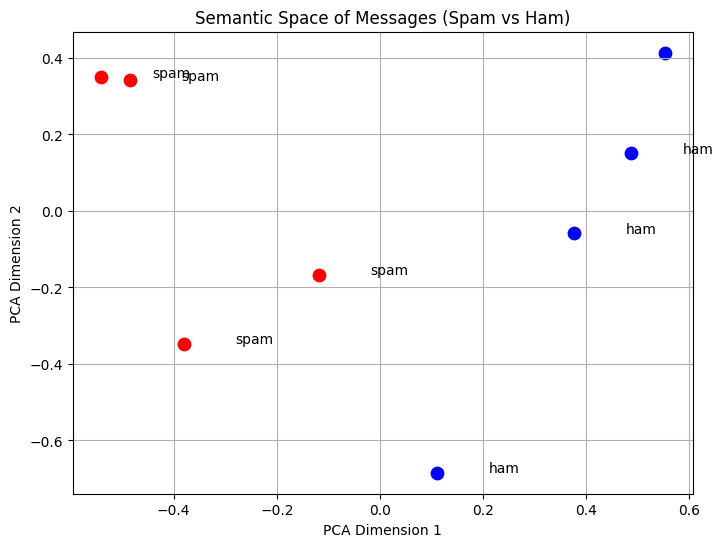

In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
for i, label in enumerate(labels):
    color = 'red' if label == 'spam' else 'blue'
    plt.scatter(reduced[i,0], reduced[i,1], color=color, s=80)
    plt.annotate(label, (reduced[i,0]+0.1, reduced[i,1]), fontsize=10)
plt.title("Semantic Space of Messages (Spam vs Ham)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid(True)
plt.show()

## 3️⃣ ฝึกโมเดลจำแนกเบื้องต้นด้วย K-Nearest Neighbors

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

encoder = LabelEncoder()
y = encoder.fit_transform(labels)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(embeddings, y)

# ทดสอบข้อความใหม่
new_messages = [
    "Get rich quick! Limited time offer, claim your reward.",
    "Please review the attached project report for tomorrow’s meeting.",
    "Win a free laptop just by signing up!"
]

new_embeds = model.encode(new_messages)
preds = clf.predict(new_embeds)

for msg, pred in zip(new_messages, preds):
    print(f"[{msg}] → {encoder.inverse_transform([pred])[0]}")

[Get rich quick! Limited time offer, claim your reward.] → spam
[Please review the attached project report for tomorrow’s meeting.] → ham
[Win a free laptop just by signing up!] → spam


## 4️⃣ การตีความเชิงบริบท

**การสังเกต:**
- ข้อความที่เกี่ยวข้องกับ *รางวัล / โปรโมชั่น / ลิงก์คลิก* จะอยู่ในบริเวณเดียวกันของ embedding space (กลุ่ม spam)
- ข้อความที่เกี่ยวข้องกับ *งาน / การสื่อสารทั่วไป* จะอยู่ในอีกบริเวณหนึ่ง (กลุ่ม ham)

**สรุป:**
Embedding ช่วยให้ระบบสามารถเข้าใจ “ความหมาย” ของข้อความได้ในเชิงบริบท ไม่ต้องพึ่ง keyword ตรงตัว เช่น “win” หรือ “offer” เท่านั้น